In [48]:
import numpy as np
import pandas as pd

In [49]:
df = pd.read_csv(r'spam.csv',encoding='ISO-8859-1')

In [50]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
321,ham,Hey... Why dont we just go watch x men and hav...,NaN,NaN,NaN
4671,spam,Customer service announcement. We recently tri...,NaN,NaN,NaN
4543,ham,when you and derek done with class?,NaN,NaN,NaN
1726,ham,\ALRITE HUNNY!WOT U UP 2 2NITE? DIDNT END UP G...,NaN,NaN,NaN
619,ham,Let there be snow. Let there be snow. This kin...,NaN,NaN,NaN


In [51]:
df.shape # Tell total shape of data means total items 

(5572, 5)

In [52]:
# 1. Data Cleaning
# 2. EDA Exploratory data Analysis
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvements depending on evaluation
# 7. Website
# 8. Deployment

## 1. Data Cleaning

In [53]:
df.info() # to check if even need those Unnamed values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [54]:
# As we can see last 3 columns are not necessary so we will drop them
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [55]:
df.sample(5)

,v1,v2
1890,ham,Ok but knackered. Just came home and went to s...
1715,ham,Asking do u knw them or nt? May be ur frnds or...
3134,ham,Wat makes some people dearer is not just de ha...
351,ham,If you're not in my car in an hour and a half ...
1124,ham,Aiyar sorry lor forgot 2 tell u...


In [56]:
# renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
5476,ham,Yes princess! I want to please you every night...
4977,ham,JADE ITS PAUL. Y DIDNåÕT U TXT ME? DO U REMEMB...
1340,ham,Might ax well im there.
999,ham,"Aight will do, thanks again for comin out"
273,ham,"Usf I guess, might as well take 1 car"


In [57]:
# scikit-learn (often referred to as sklearn) is an open-source machine learning library for Python.
from sklearn.preprocessing import LabelEncoder 
encoder = LabelEncoder()

In [58]:
# Ham is legitimate, non-spam content.
# Spam is considered to be unsolicited messages with commercial and malicious intent.
df['target']=encoder.fit_transform(df['target'])

# I want ham to be denoted as 0 and spam as 1

In [59]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [60]:
# checking missing value
df.isnull().sum()

target    0
text      0
dtype: int64

In [61]:
# Checking for duplicates values
df.duplicated().sum()

np.int64(403)

In [62]:
# remove duplicates
df=df.drop_duplicates(keep='first')

In [63]:
df.duplicated().sum()

np.int64(0)

In [64]:
# checking df shape
df.shape

(5169, 2)

## 2. EDA (Exploratory Data Analysis)

In [65]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [66]:
# TO see how many numbers of ham and spams are there int he data
df['target'].value_counts()

# 0 refers to ham
# 1 refes to spam

target
0    4516
1     653
Name: count, dtype: int64

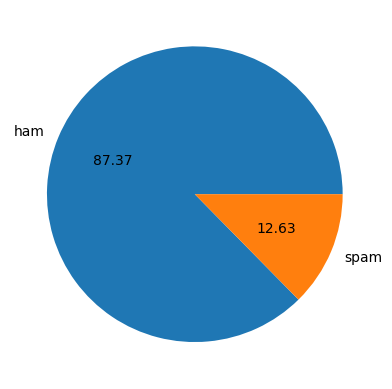

In [67]:
# ploting diagramatic representation of data
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f") # autopct for percentage values
plt.show()

#### Data is imbalanced

In [68]:
# Now the Analysis we easily perfor in our data is check how many alphabet, words and sentences are there in our data
import nltk # Natural language Toolkit

In [69]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [70]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [71]:
df['num_characters'] = df['text'].apply(len)
# this will give length of every message in term of characters

In [72]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [73]:
# number of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [74]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [75]:
# number of sentences
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [76]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [77]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [78]:
# Analyzing Ham and spam seperately
# this for ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [79]:
# this for Spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [80]:
# Seaborn is a powerful statistical data visualization library built on top of Matplotlib in Python.
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

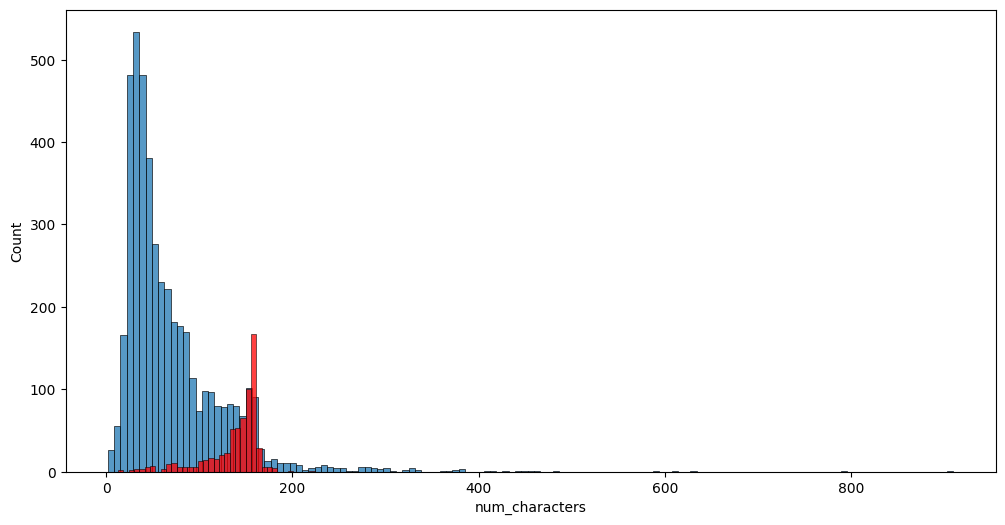

In [81]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters']) #ham
sns.histplot(df[df['target'] == 1]['num_characters'],color='red') #spam

# on an average number of character are higher in spam as compare to ham

<Axes: xlabel='num_words', ylabel='Count'>

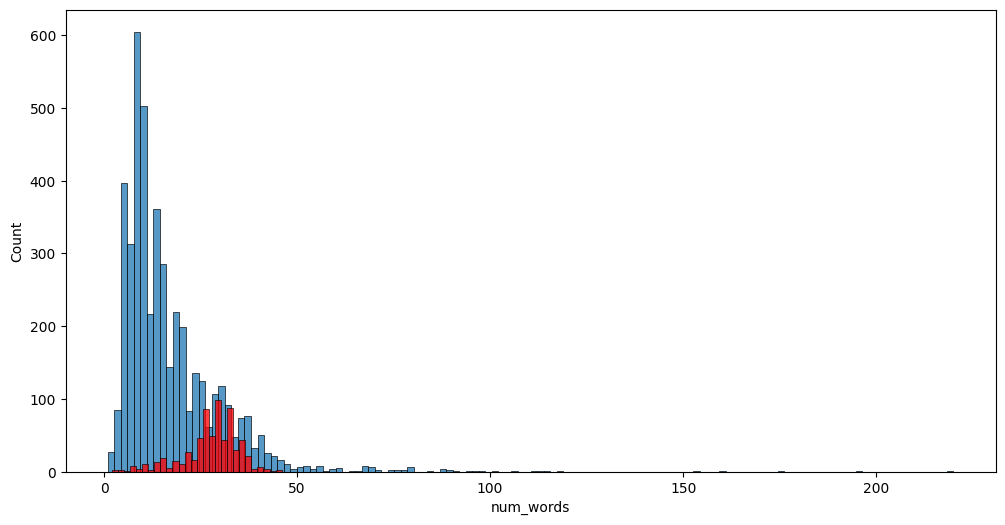

In [82]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words']) #ham
sns.histplot(df[df['target'] == 1]['num_words'],color='red') #spam

# on an average number of words are higher in spam as compare to ham

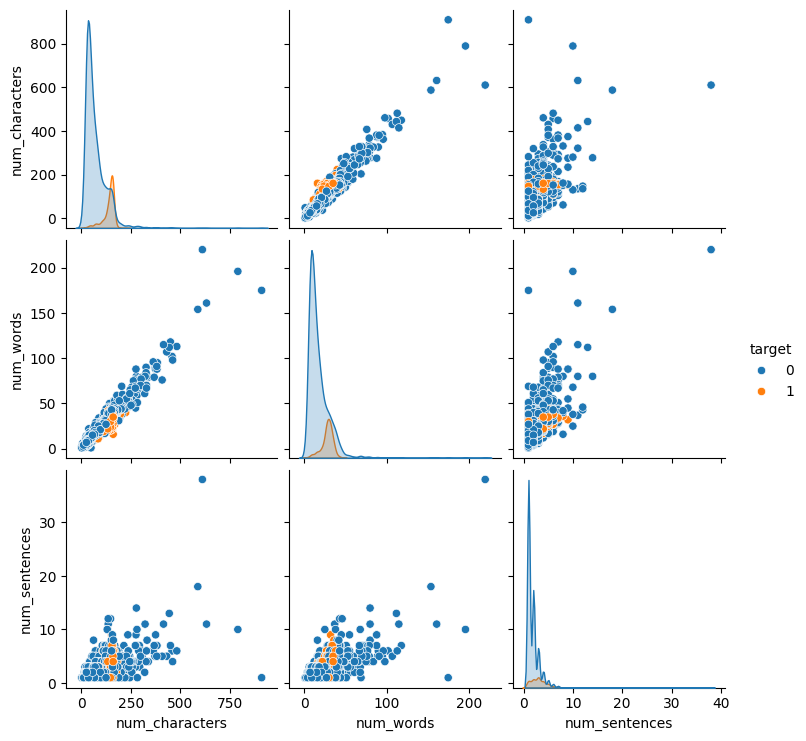

In [83]:
# comparing number of words to number to sentence
sns.pairplot(df,hue='target')

In [84]:
numeric_df=df.select_dtypes(include=[float, int])

<Axes: >

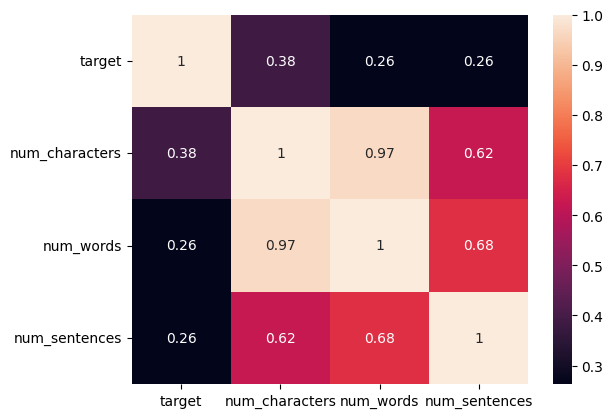

In [85]:
sns.heatmap(numeric_df.corr(),annot=True)

In [86]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


## 3. Data Preprocessing
- Lower Case
- Tokenization
- Removing special characters
- Removing stop words and punctuation like is, of, the.
- Stemming

In [87]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### Tokenization and Removing Special Characters

In [88]:
# to look at panctuation marks
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [89]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [90]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    # taking only alphabet and alphanumeric words
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)


In [98]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

## TO RETRIVE A PARTICULAR TEXT FROM THE DATA 

In [92]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

---

In [93]:
from nltk.corpus import stopwords
# stopwords.words('english') # Stopwards are those words that helps in sentence formation but has no actua has no better impact.
#These words are generally considered less informative because they appear frequently across many texts but don't carry significant meaning on their own.

### Stemming

In [94]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [95]:
ps.stem('loving')

'love'

In [99]:
df['transformed_text'] = df['text'].apply(transform_text)

In [100]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## Words Cloud 
A word cloud (or tag cloud) is a visual representation of text data, typically used to depict the frequency or importance of words within a given text.

In [101]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [102]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

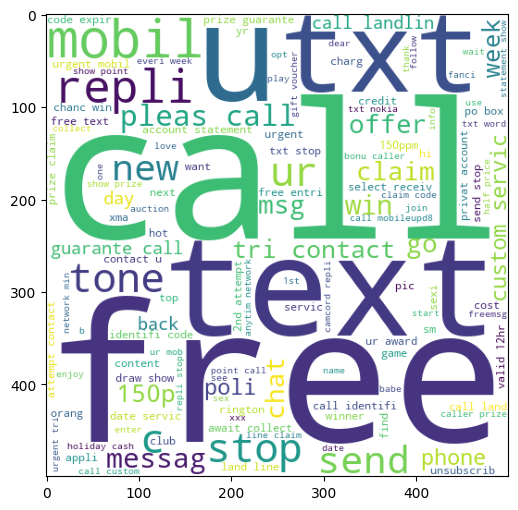

In [103]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [104]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

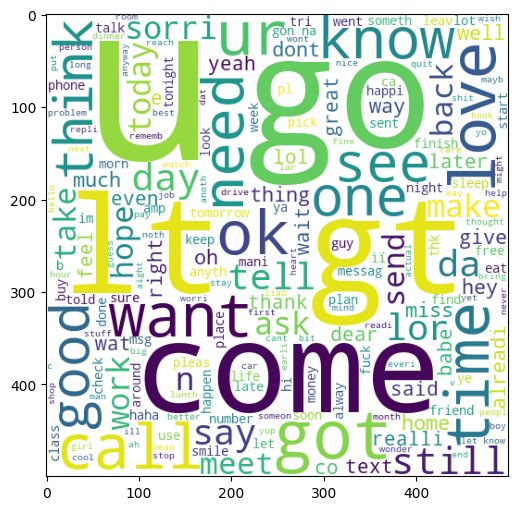

In [105]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [106]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


---

## LETS SEE TOP 30 WORDS of HAM and SPAM

In [107]:
# df[df['target'] == 1]

In [108]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [109]:
len(spam_corpus)

9939

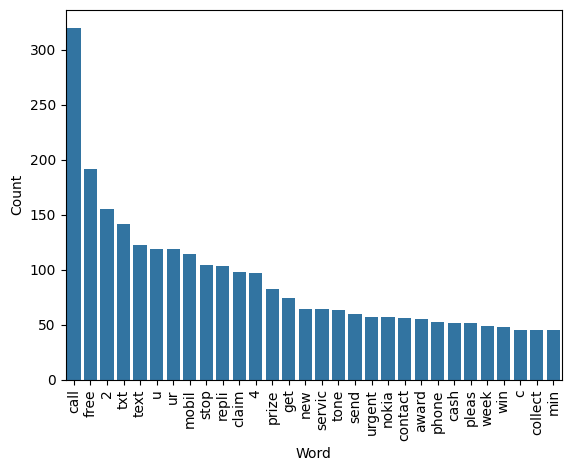

In [110]:
# This will create dictionary which will show how many time a particular word is used or repeated
from collections import Counter
# Assuming spam_corpus is your list of text data
# Counter(spam_corpus).most_common(30) returns a list of tuples (word, count)
# Converting it to a DataFrame for easier handling

word_count_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Count'])

# Using seaborn to create the barplot
sns.barplot(x='Word', y='Count', data=word_count_df)
plt.xticks(rotation='vertical')
plt.show()

In [111]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [112]:
len(ham_corpus)

35404

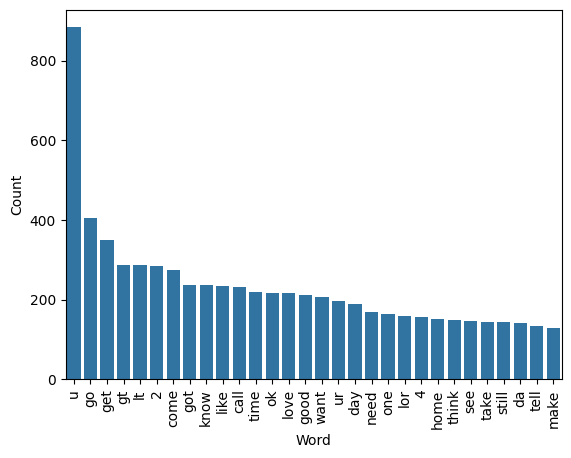

In [113]:
from collections import Counter
# Assuming ham_corpus is your list of text data
# Counter(ham_corpus).most_common(30) returns a list of tuples (word, count)
# Converting it to a DataFrame for easier handling

word_count_df = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Count'])

# Using seaborn to create the barplot
sns.barplot(x='Word', y='Count', data=word_count_df)
plt.xticks(rotation='vertical')
plt.show()

---

## 4. Model Building

We will first make the algorithm of Naive Bayes Algorithm because in textual data this algorithm gives better performance 

**Vectorization Techniques**
- Bag of words(BoW): It simplifies text data into a form that can be easily processed by machine learning algorithms.

In [114]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [115]:
# X = cv.fit_transform(df['transformed_text']).toarray()
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [116]:
# X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [117]:
X.shape # gives range of the the frame

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X) // NOT USEFUL FOR OUR ALGORITHM 

#ques: Why we used MinMaxScaler instead of Standard Scaler
#ans: Because standard scaler also give negetive values which is not accepted by Naive Bayes Algorithm 

(5169, 3000)

In [118]:
y = df['target'].values

In [119]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [120]:
# we will apply train text split
from sklearn.model_selection import train_test_split

In [121]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [122]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
# Why we don't know the distribution of data 
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [123]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [124]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test) 
print(accuracy_score(y_test,y_pred1)) # Accuracy of model to detect spam or ham
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1)) # Precision of model to detect spam or ham

# NOTE
# ACCURACY SCORE AND PRECISION SCORE BOTH WILL GET CONVERTED INTO PERCENTAGE

0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


In [125]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test) 
print(accuracy_score(y_test,y_pred2)) # Accuracy of model to detect spam or ham
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2)) # Precision of model to detect spam or ham

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [126]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test) 
print(accuracy_score(y_test,y_pred3)) # Accuracy of model to detect spam or ham
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3)) # Precision of model to detect spam or ham

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


---
**tfidfVectorizer --> Multinomial NB**

**Ques. Why we use Multinomial NB over Binomial NB?**

Ans: Because data we have is inbalance due to inbalance accuracy is not a reliable source for model. So, we will take model with more Precision.

---

### Comparing other machine learning models with Multinomial Naive bayes

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [128]:
svc = SVC(kernel="sigmoid",gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [129]:
# dictionary contain all classification ML algo with thier object
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'Bgc' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}

In [130]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy =  accuracy_score(y_test,y_pred)
    precision = float(precision_score(y_test,y_pred))

    return accuracy,precision

In [131]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [132]:
accuracy_scores = []
precision_scores = []

# we use this loop to apply all algorithm on dictionary to get store and store the accuracy and precision data.
for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
    print("For",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ", current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For KN
Accuracy -  0.9052224371373307
Precision -  1.0
For NB
Accuracy -  0.9709864603481625
Precision -  1.0
For DT
Accuracy -  0.9323017408123792
Precision -  0.8333333333333334
For LR
Accuracy -  0.9555125725338491
Precision -  0.96
For RF
Accuracy -  0.9738878143133463
Precision -  0.9826086956521739


C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For AdaBoost
Accuracy -  0.9690522243713733
Precision -  0.9732142857142857
For Bgc
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For GBDT
Accuracy -  0.9506769825918762
Precision -  0.9306930693069307
For xgb
Accuracy -  0.965183752417795
Precision -  0.9396551724137931


In [133]:
# STOP HERE WHEN YOOU ARE APPENDING NEW RESULTS

In [134]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [135]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.973888,0.982609
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
6,AdaBoost,0.969052,0.973214
4,LR,0.955513,0.960000
10,xgb,0.965184,0.939655
9,GBDT,0.950677,0.930693
7,Bgc,0.958414,0.868217


In [136]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [137]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.973888
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,AdaBoost,Accuracy,0.969052
6,LR,Accuracy,0.955513
7,xgb,Accuracy,0.965184
8,GBDT,Accuracy,0.950677
9,Bgc,Accuracy,0.958414


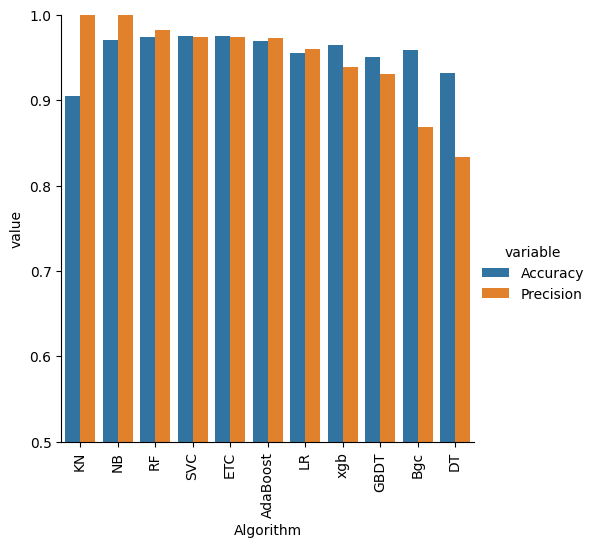

In [138]:
sns.catplot(x = 'Algorithm', y = 'value',
           hue = 'variable', data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

## Model Improvement

In [ ]:
# 1. Change The max_features parameter of TfIdf

---
### AFTER THIS CELL NOTHING MATTERS

In [ ]:
# temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [ ]:
# temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [ ]:
# performance_df.merge(temp_df,on='Algorithm')

# new_df = performance_df.merge(temp_df,on='Algorithm')

In [ ]:
# new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [ ]:
# new_df_scaled

### SCALLING IS NOT USEFUL FOR OUR ALGORITHM

---

### WE WILL USE VOTING CLASSIFIER

Goal of this **VOTING CLASSIFIER** is to maintain a **100% precision** while slighting increasing the **accuracy from 97%.**

In [ ]:
# svc = SVC(kernel = 'sigmoid', gamma=1.0, probability = True)
# mnb = MultinomialNB()
# etc = ExtraTreesClassifier(n_estimators=50, random_state = 2)

# from sklearn.ensemble import VotingClassifier

In [ ]:
# voting = VotingClassifier(estimators = [('svm',svc), ('nb',mnb), ('et', etc)],voting='soft')

In [ ]:
# voting.fit(X_train,y_train)

In [ ]:
# y_pred = voting.predict(X_test)
# print("Accuracy",accuracy_score(y_test,y_pred))
# print("Precision",precision_score(y_test,y_pred))

#### Even though we got slight increase in accuracy from 97% to 97.8% but precision got decrease from 100% which means its not a good algorithm for our model. 

---

### NOW WE WILL YOU USE STACKING

In [ ]:
# estimators = [('svm',svc),('nb', mnb),('et', etc)]
# final_estimator = RandomForestClassifier()

In [ ]:
# from sklearn.ensemble import StackingClassifier

In [ ]:
# clf = StackingClassifier(estimators = estimators, final_estimator = final_estimator)

In [ ]:
# clf.fit(X_train,y_train)
# y_pred = clf.predict(X_test)
# print("Accuracy",accuracy_score(y_test,y_pred))
# print("Precision",precision_score(y_test,y_pred))

#### This model is also NOT VERY USEFUL
---

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorize.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))